## 1. Loading Libraries and Data

In [1]:
library(ggplot2)
library(tidyverse)
library(GGally)
library(skimr)
library(corrplot)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.95 loaded



In [30]:
data <- read.csv("expenses.csv")

In [31]:
names(data)

[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "charges"

## 2. Data Preprocessing

In [32]:
summary(data)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

In [33]:
str(data)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [34]:
# converting categorical variables to factor
data$sex <- as.factor(data$sex)
data$smoker <- as.factor(data$smoker)
data$region <- as.factor(data$region)

In [35]:
data[duplicated(data) | duplicated(data, fromLast = TRUE),  ]

,age,sex,bmi,children,smoker,region,charges
,<int>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>
196,19,male,30.59,0,no,northwest,1639.563
582,19,male,30.59,0,no,northwest,1639.563


In [17]:
# Total number of duplicate rows
sum(duplicated(data))

[1] 0

In [18]:
# checking for the missing values
colSums(is.na(data))

age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0

In [19]:
norm_data <- data
num_cols <- c("age", "bmi", "children", "charges")
norm_data[num_cols] <- as.data.frame(scale(norm_data[num_cols]))
#use  norm_data for linear Regression and  use original data for other models like decision trees and random forest

# 3. EDA (Exploratory Data Analysis)

### 3.1Univariate Analysis

In [20]:
mean_age <- mean(data$age, na.rm = TRUE) 
median_age <- median(data$age, na.rm = TRUE)
get_mode <- function(x){
    ux <- unique(x)
    ux [which.max(tabulate(match(x,ux)))]
}
mode_age <- get_mode(data$age)

In [21]:
mean_age
median_age
mode_age

[1] 41.6784

[1] 42

[1] 24

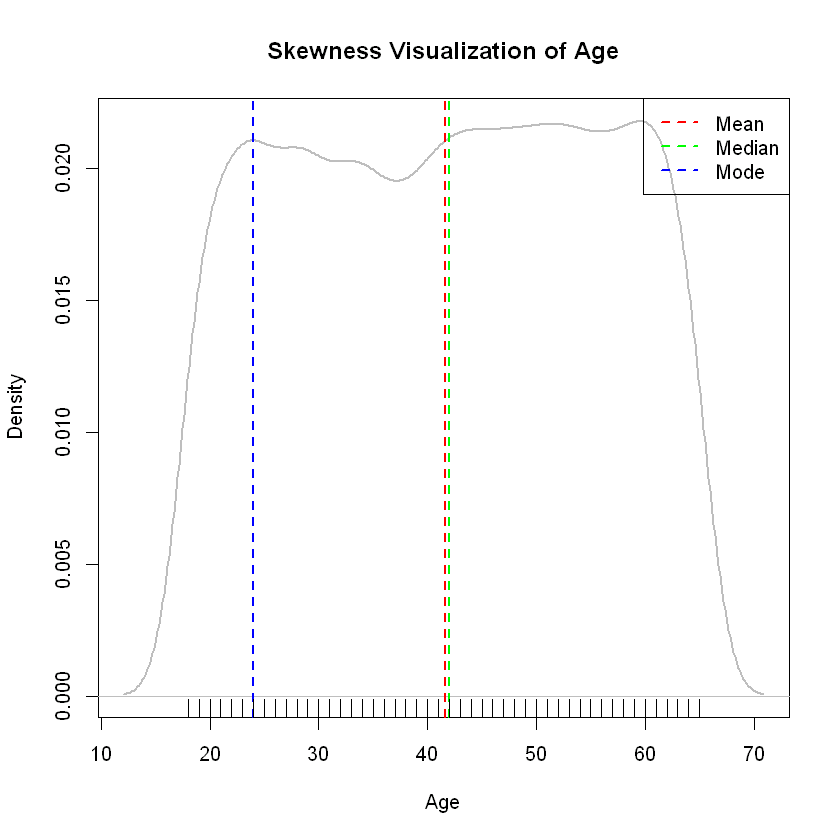

In [22]:
# Plot density plot
plot(density(data$age), 
     main = "Skewness Visualization of Age", 
     xlab = "Age", 
     ylab = "Density", 
     col = "gray", 
     lwd = 2)

# Add vertical lines for mean, median, mode
abline(v = mean_age, col = "red", lwd = 2, lty = 2)
abline(v = median_age, col = "green", lwd = 2, lty = 2)
abline(v = mode_age, col = "blue", lwd = 2, lty = 2)

# Add legend
legend("topright", 
       legend = c("Mean", "Median", "Mode"), 
       col = c("red", "green", "blue"), 
       lty = 2, 
       lwd = 2)

# Optional: add rug plot (marks on x-axis)
rug(data$age)

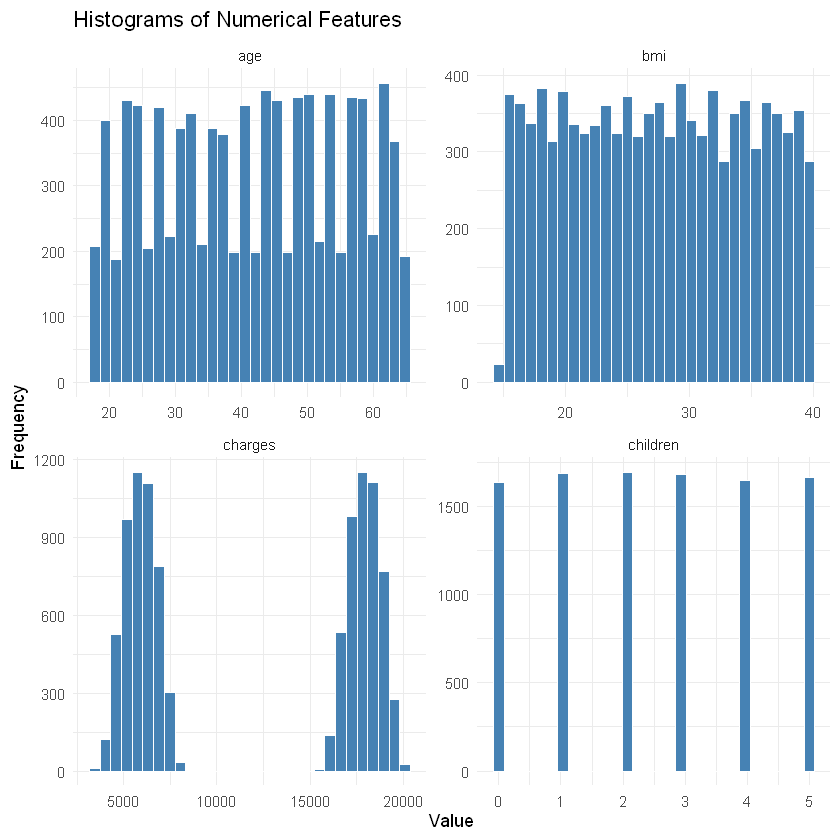

In [23]:
data %>%
  select(age, bmi, children, charges) %>%
  pivot_longer(cols = everything(), names_to = "Feature", values_to = "Value") %>%
  ggplot(aes(x = Value)) +
  facet_wrap(~ Feature, scales = "free", ncol = 2) +
  geom_histogram(fill = "steelblue", color = "white", bins = 30) +
  theme_minimal() +
  labs(title = "Histograms of Numerical Features",
       x = "Value", y = "Frequency")

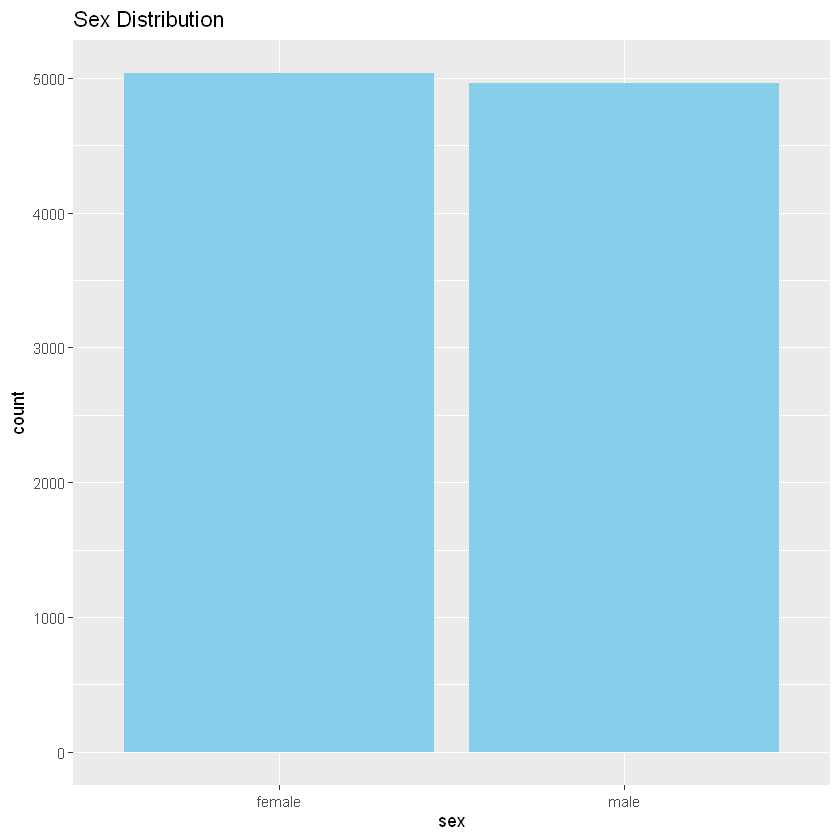

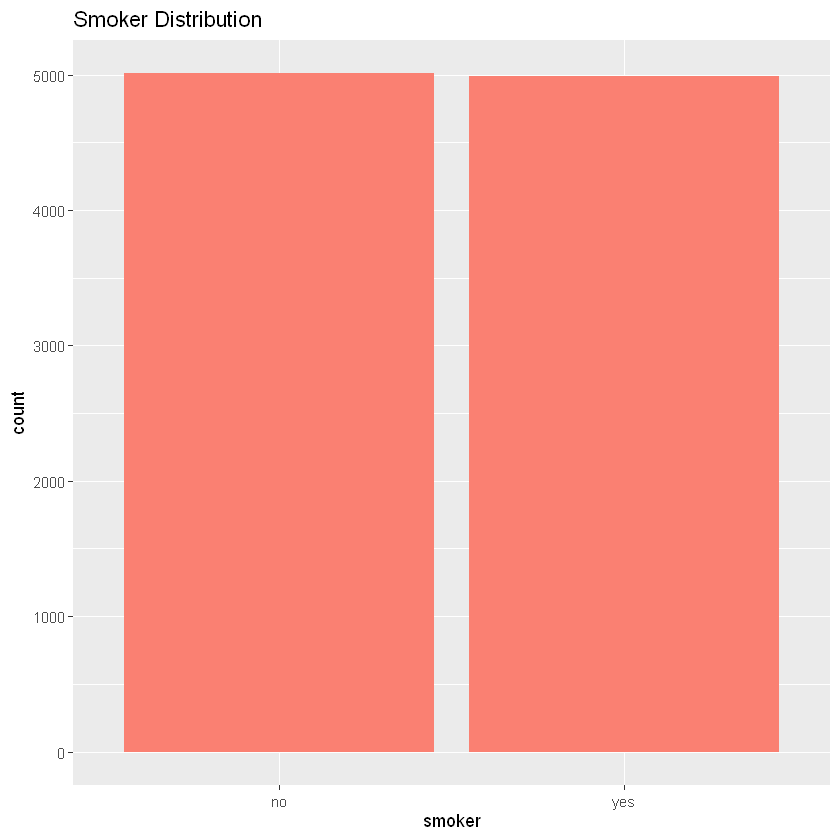

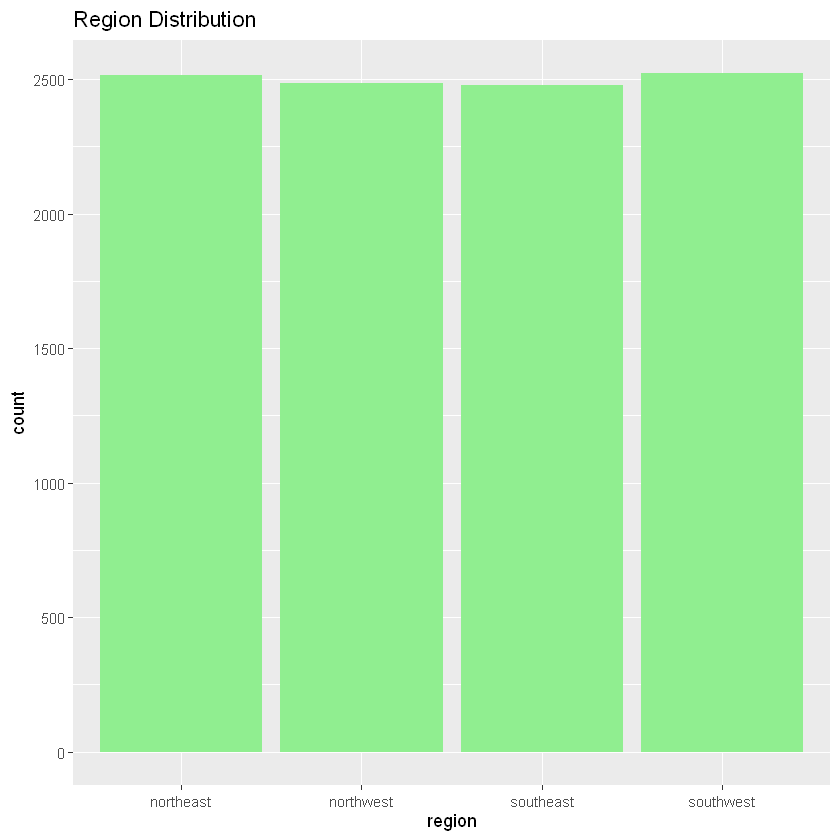

In [24]:
# Bar plots for categorical features
ggplot(data, aes(x = sex)) + geom_bar(fill = "skyblue") + ggtitle("Sex Distribution")
ggplot(data, aes(x = smoker)) + geom_bar(fill = "salmon") + ggtitle("Smoker Distribution")
ggplot(data, aes(x = region)) + geom_bar(fill = "lightgreen") + ggtitle("Region Distribution")


# Bivariate Analysis

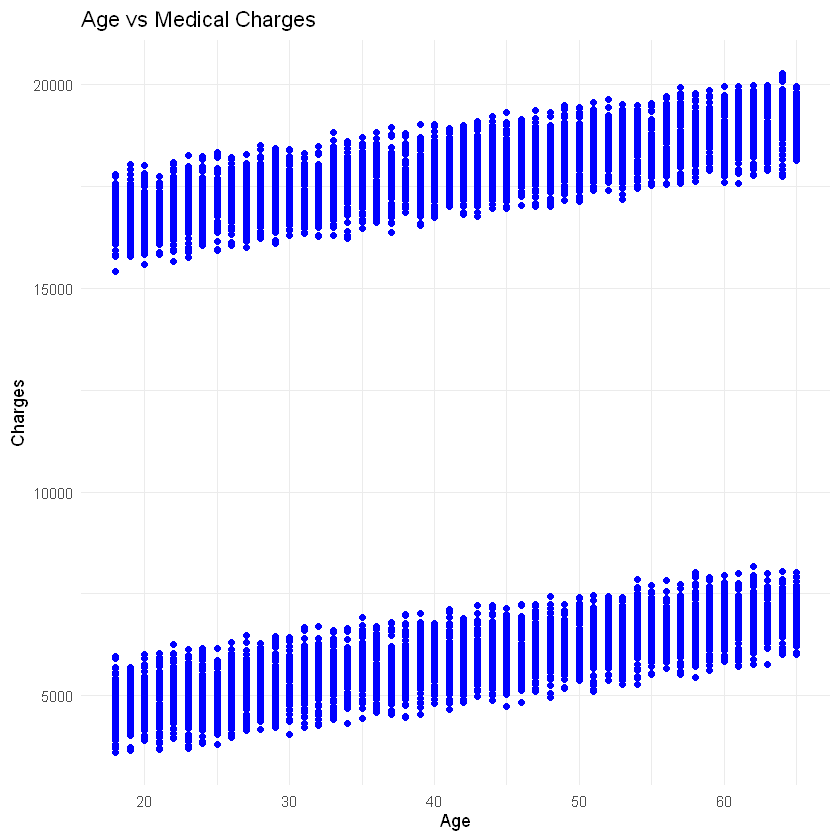

In [25]:
# Plot: Age Vs Charges

ggplot(data, aes(x = age, y = charges)) + 
    geom_point(color = 'blue') +
    labs(title = 'Age vs Medical Charges',
         x = 'Age',
         y = 'Charges') +
    theme_minimal()

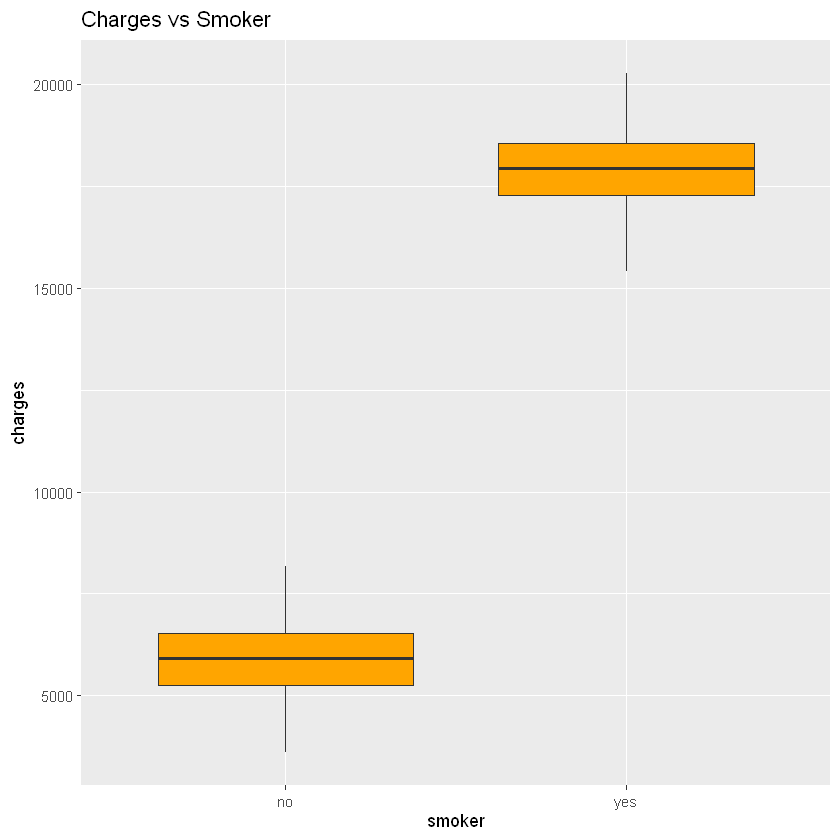

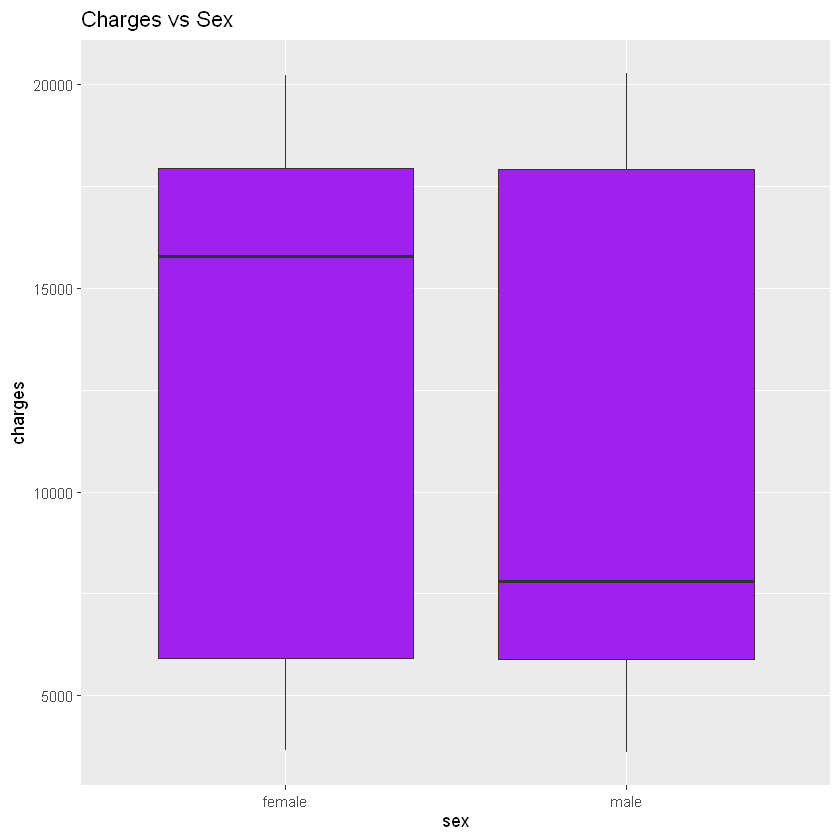

In [26]:
# Boxplots: Charges vs categorical
ggplot(data, aes(x = smoker, y = charges)) + geom_boxplot(fill = "orange") + ggtitle("Charges vs Smoker")
ggplot(data, aes(x = sex, y = charges)) + geom_boxplot(fill = "purple") + ggtitle("Charges vs Sex")

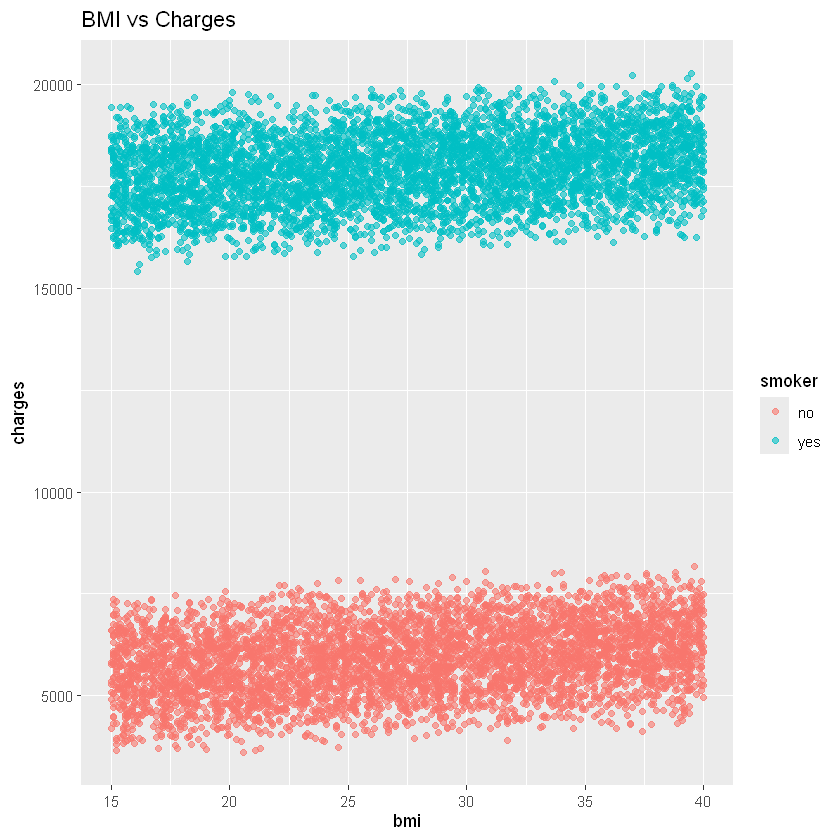

In [27]:
# Scatter plot: BMI vs Charges
ggplot(data, aes(x = bmi, y = charges, color = smoker)) +
  geom_point(alpha = 0.6) + ggtitle("BMI vs Charges")

In [28]:
# Correlation matrix for numeric columns

# Calculate correlation matrix
cor_matrix <- cor(data[num_cols])

# Print the matrix as numbers
print(cor_matrix)


                  age          bmi     children    charges
age       1.000000000 -0.005848194 -0.004943984 0.12564945
bmi      -0.005848194  1.000000000  0.014561676 0.03524891
children -0.004943984  0.014561676  1.000000000 0.06957513
charges   0.125649448  0.035248913  0.069575127 1.00000000


# Multivariate Analysis

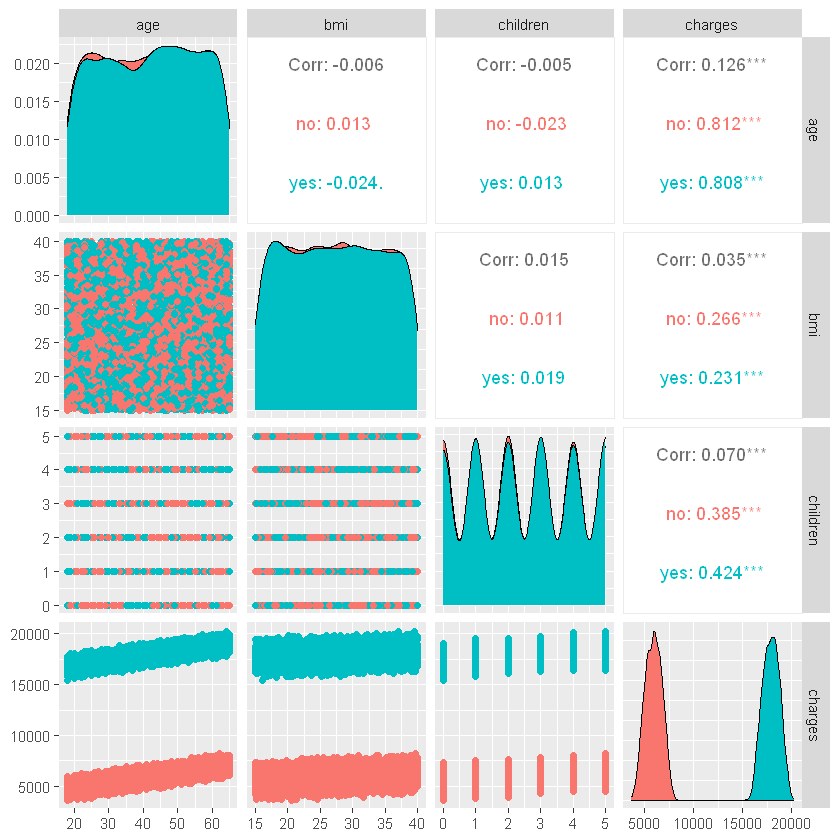

In [29]:
# Pair plot
GGally::ggpairs(data, columns = c("age", "bmi", "children", "charges"), aes(color = smoker))